In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import mplsoccer
import numpy as np
import highlight_text
from mplsoccer import Bumpy

from PIL import Image
from io import BytesIO
import requests
from mplsoccer import FontManager

In [205]:
league = 'Championship'

In [206]:
df = pd.read_excel(f"C:\\Users\\George\\Documents\\Football Analytics\\Data\\{league} Position.xlsx")

In [207]:
for x in df.columns:
    if x != 'Team':
        df[x] = df[x].astype(int)

In [208]:
df_badge = df.copy()

In [209]:
df2 = pd.read_excel(f"C:\\Users\\George\\Documents\\Football Analytics\\Data\\{league} colours.xlsx")

In [210]:
df2['Badge'] = df2['name'].apply(lambda x: f"C:/Users/George/Documents/Football Analytics/Team Logos/{x.lower()}_logo.png")

In [211]:
df2 = df2[['team_colours','Badge']]

In [212]:
df_badge['Badge'] = df2['Badge']

In [213]:
df['Team Colours'] = df2['team_colours']

In [214]:
team_colors_dict = {team: color for team, color in zip(df['Team'], df['Team Colours'])}

In [215]:
df.drop('Team Colours', axis=1, inplace=True)

In [216]:
df = df.T

In [217]:
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Team,Leicester,Ipswich,Leeds,Southampton,West Brom,Norwich,Hull City,Middlesbrough,Coventry,Preston,...,Watford,Sunderland,Stoke City,QPR,Blackburn,Sheff Wed,Plymouth,Birmingham,Huddersfield,Rotherham
Week 1,8,5,10,7,18,6,20,21,16,14,...,1,19,2,24,4,17,3,13,22,23
Week 2,2,1,19,6,14,5,12,24,11,8,...,3,21,13,16,7,22,4,10,23,20
Week 3,2,1,19,5,12,3,7,23,10,6,...,9,15,8,17,13,24,11,4,21,22
Week 4,1,6,13,4,7,2,8,22,12,5,...,15,18,10,19,9,24,16,3,23,21
Week 5,3,2,15,7,11,5,6,24,14,1,...,18,9,16,17,13,23,10,4,21,20
Week 6,2,3,10,9,13,4,5,24,15,1,...,12,7,19,20,8,23,14,6,17,21
Week 7,2,3,9,13,15,5,6,24,17,1,...,14,4,19,20,12,23,18,8,16,21
Week 8,1,2,6,15,13,8,4,22,18,3,...,16,5,20,19,14,24,12,10,17,23
Week 9,1,2,9,10,8,7,5,21,14,3,...,20,4,16,22,18,24,13,12,17,23


In [218]:
df.columns = df.iloc[0]
df = df.iloc[1:]

In [219]:
df.head()

Team,Leicester,Ipswich,Leeds,Southampton,West Brom,Norwich,Hull City,Middlesbrough,Coventry,Preston,...,Watford,Sunderland,Stoke City,QPR,Blackburn,Sheff Wed,Plymouth,Birmingham,Huddersfield,Rotherham
Week 1,8,5,10,7,18,6,20,21,16,14,...,1,19,2,24,4,17,3,13,22,23
Week 2,2,1,19,6,14,5,12,24,11,8,...,3,21,13,16,7,22,4,10,23,20
Week 3,2,1,19,5,12,3,7,23,10,6,...,9,15,8,17,13,24,11,4,21,22
Week 4,1,6,13,4,7,2,8,22,12,5,...,15,18,10,19,9,24,16,3,23,21
Week 5,3,2,15,7,11,5,6,24,14,1,...,18,9,16,17,13,23,10,4,21,20


In [220]:
week = ['Week '+ str(num) for num in range(1,47)]

In [287]:
bumpy = Bumpy(
    rotate_xticks=0, ticklabel_size=14, scatter_primary= 'o',
    show_right=False, plot_labels=True, alignment_xvalue=0.165,
    alignment_yvalue=.5, curviness=0,background_color="#DDE3E5", scatter_color="#808080",
    label_color="#000000", line_color="#C0C0C0",
)

In [222]:
df.head()

Team,Leicester,Ipswich,Leeds,Southampton,West Brom,Norwich,Hull City,Middlesbrough,Coventry,Preston,...,Watford,Sunderland,Stoke City,QPR,Blackburn,Sheff Wed,Plymouth,Birmingham,Huddersfield,Rotherham
Week 1,8,5,10,7,18,6,20,21,16,14,...,1,19,2,24,4,17,3,13,22,23
Week 2,2,1,19,6,14,5,12,24,11,8,...,3,21,13,16,7,22,4,10,23,20
Week 3,2,1,19,5,12,3,7,23,10,6,...,9,15,8,17,13,24,11,4,21,22
Week 4,1,6,13,4,7,2,8,22,12,5,...,15,18,10,19,9,24,16,3,23,21
Week 5,3,2,15,7,11,5,6,24,14,1,...,18,9,16,17,13,23,10,4,21,20


In [276]:
fm_rubik = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/'
                       'rubikmonoone/RubikMonoOne-Regular.ttf')

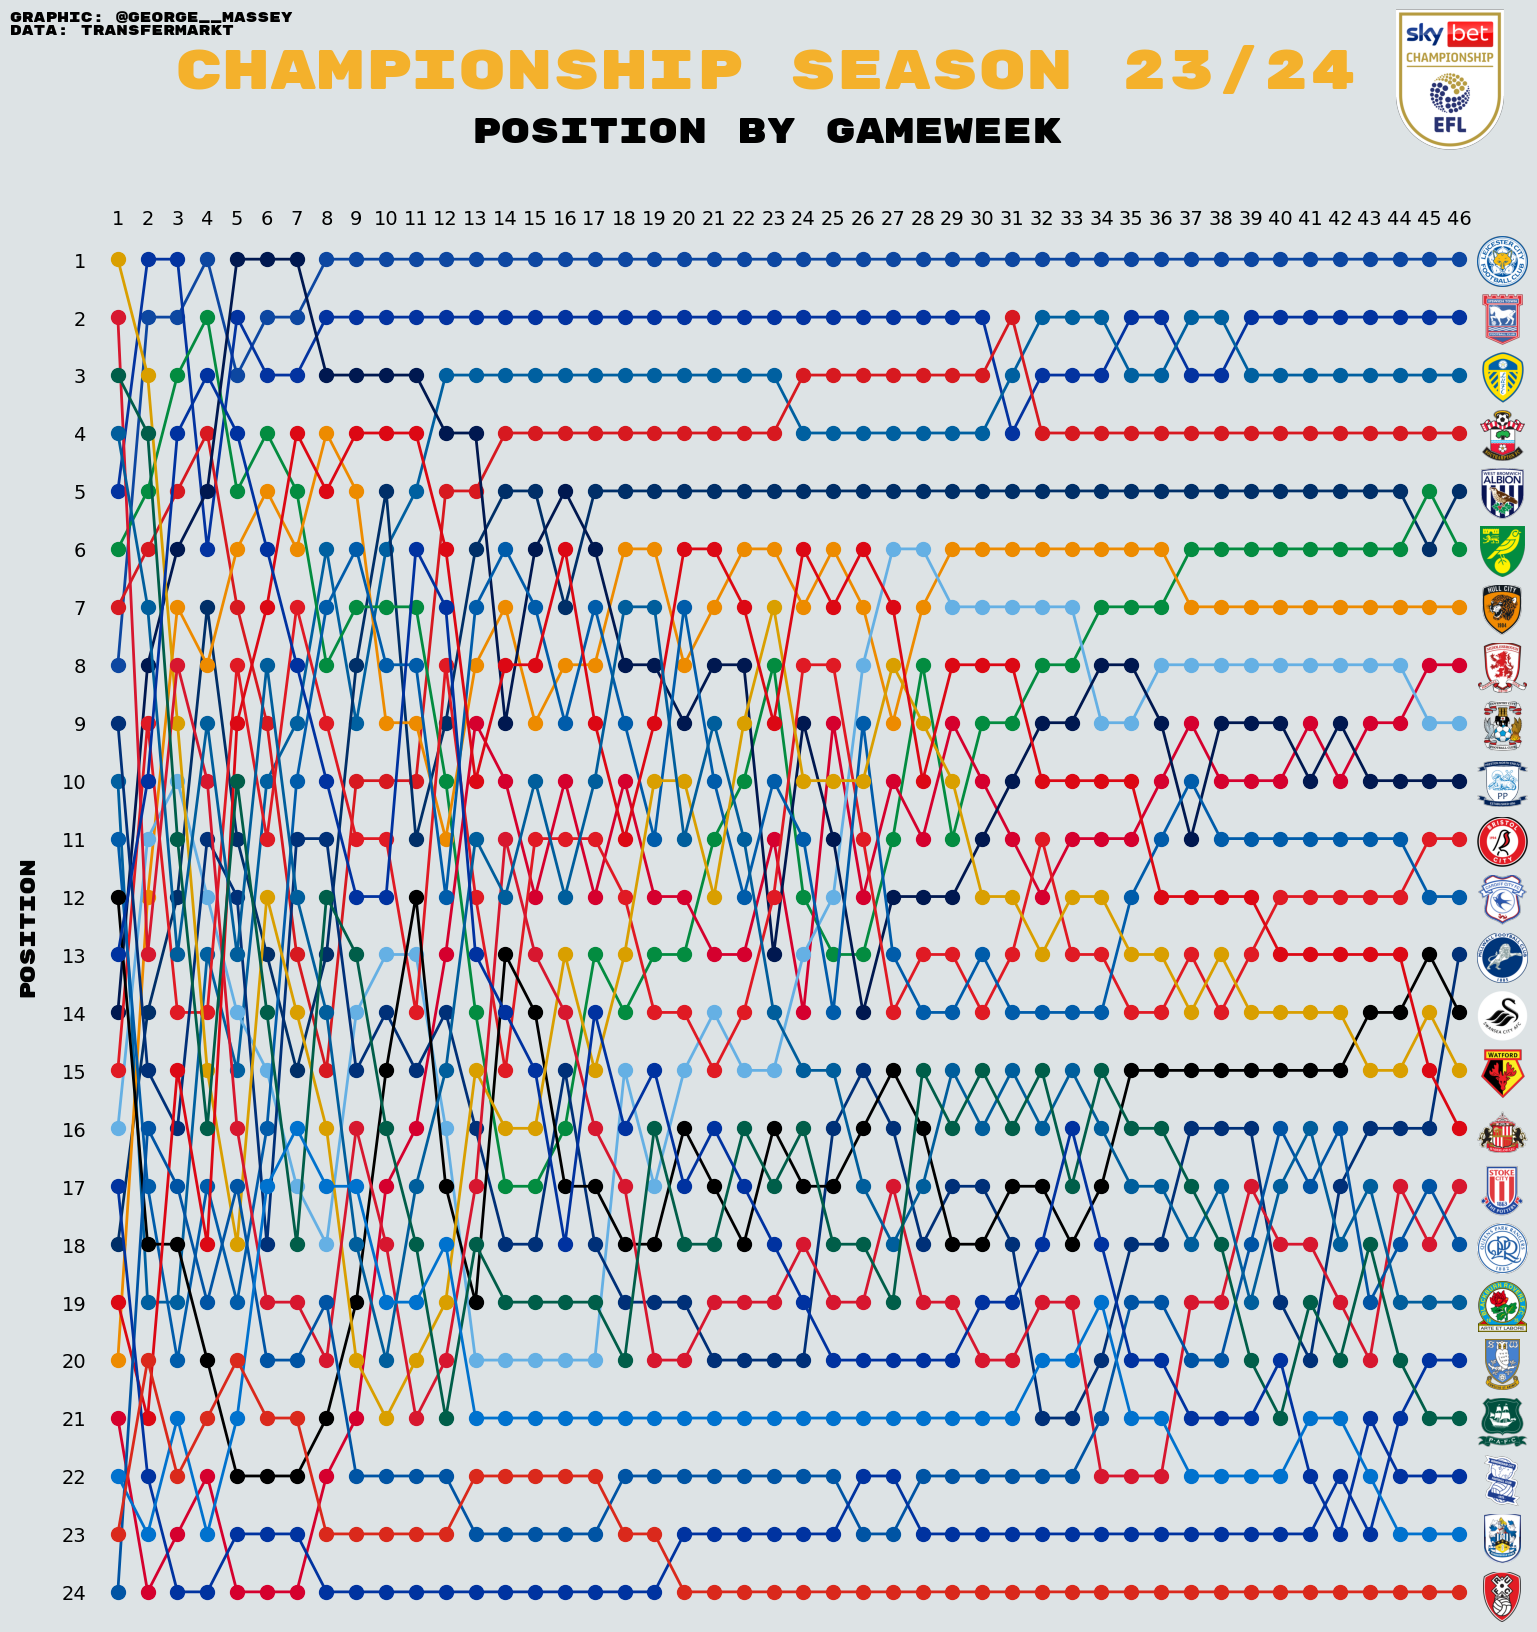

In [299]:
highlight_dict = team_colors_dict

fig, ax = bumpy.plot(
    x_list = np.linspace(1,46,46).astype(int),
    y_list = np.linspace(1,24,24).astype(int),
    values = df,
    secondary_alpha = .5,
    highlight_dict = highlight_dict,
    figsize = (18,18),
    y_label = 'POSITION',
    #ylim = (-.1,26),
    lw = 2
)

fig.text(s = f'{league} Season 23/24',x = .5, y = .96,
        c = '#F4B12C',size=40,weight='bold',ha='center',
        fontproperties=fm_rubik.prop
       )

fig.text(s = 'Position by Gameweek',x = .5, y = .93,
         c = 'black',size=25,weight='bold',ha='center',
            fontproperties=fm_rubik.prop
       )

fig.text(s = 'Graphic: @george__massey\nData: Transfermarkt',x = .08, y = .99,
         c = 'black',size=10,ha='left',
            fontproperties=fm_rubik.prop)

ax2 = fig.add_axes([.85,.92,.06,.09])
ax2.axis('off')
img = Image.open(f"C:/Users/George/Documents/Football Analytics/Images/{league.lower()}_logo.png")
ax2.imshow(img)
#ax.set_xlabel('Gameweek')

for x in range(len(df_badge['Badge'])):
    badge = df_badge['Badge'][x]
    ax3 = fig.add_axes([0.895,0.85-(x/31),.028,.028])
    ax3.axis('off')
    img = Image.open(badge)
    ax3.imshow(img)
ax.set_ylabel('Position',size=15,weight='bold',fontproperties=fm_rubik.prop)
ax.xaxis.tick_top()
ax.margins(x=0.02, y=0.02)


In [300]:
fig.savefig(
    f"C:/Users/George/Documents/Football Analytics/Visuals/{league} Positions.png",
    facecolor=ax.get_facecolor(),
    dpi=200,
    bbox_inches="tight"
)